In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('path/data_retail.csv', sep=';')

In [3]:
df.head()

,no,Row_Num,Customer_ID,Product,First_Transaction,Last_Transaction,Average_Transaction_Amount,Count_Transaction
0,1,1,29531,Jaket,1466304274396,1538718482608,1467681,22
1,2,2,29531,Sepatu,1406077331494,1545735761270,1269337,41
2,3,3,141526,Tas,1493349147000,1548322802000,310915,30
3,4,4,141526,Jaket,1493362372547,1547643603911,722632,27
4,5,5,37545,Sepatu,1429178498531,1542891221530,1775036,25


**Data dictionary**

- no : nomor urut padadataset
- Row_Num = nomor urut baris
- Customer_ID = ID unik untuk setiap pelanggan
- Product = produk yang dibeli oleh pelanggan
- First_Transaction = tanggal pertama kali pelanggan melakukan transaksi
- Last_Transaction = tanggal terakhir kali pelanggan melakukan transaksi
- Average_Transaction_Amount = rata-rata jumlah transaksi oleh pelanggan
- Count_Transaction = Jumlah total transaksi yang dilakukan oleh pelanggan

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   no                          100000 non-null  int64 
 1   Row_Num                     100000 non-null  int64 
 2   Customer_ID                 100000 non-null  int64 
 3   Product                     100000 non-null  object
 4   First_Transaction           100000 non-null  int64 
 5   Last_Transaction            100000 non-null  int64 
 6   Average_Transaction_Amount  100000 non-null  int64 
 7   Count_Transaction           100000 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 6.1+ MB


Dua kolom yang menunjukkan terjadinya transaksi tidak bertipe datetime, maka kedua kolom tersebut perlu diubah ke tipe data datetime

In [5]:
# Kolom First_Transaction
df['First_Transaction'] = pd.to_datetime(df['First_Transaction']/1000, unit='s', origin='1970-01-01')
# Kolom Last_Transaction
df['Last_Transaction'] = pd.to_datetime(df['Last_Transaction']/1000, unit='s', origin='1970-01-01')

In [6]:
df.head()

,no,Row_Num,Customer_ID,Product,First_Transaction,Last_Transaction,Average_Transaction_Amount,Count_Transaction
0,1,1,29531,Jaket,2016-06-19 02:44:34.396000000,2018-10-05 05:48:02.608000000,1467681,22
1,2,2,29531,Sepatu,2014-07-23 01:02:11.493999872,2018-12-25 11:02:41.269999872,1269337,41
2,3,3,141526,Tas,2017-04-28 03:12:27.000000000,2019-01-24 09:40:02.000000000,310915,30
3,4,4,141526,Jaket,2017-04-28 06:52:52.546999808,2019-01-16 13:00:03.911000064,722632,27
4,5,5,37545,Sepatu,2015-04-16 10:01:38.530999808,2018-11-22 12:53:41.529999872,1775036,25


- Dalam kasus ini, kategori churn ditentukan jika transaksi terakhir dilakukan pada tanggal 1 Agustus tahun 2018

- Dibentuk kolom baru bernama 'is_churn' yang berisi apakah customer tersebut mengalami churn atau tidak berdasarkan pendefinisian kondisi churn yang ada

In [7]:
# Pengecekan transaksaksi terakhir dalam dataset
print(max(df['Last_Transaction']))
print(max(df['First_Transaction']))

2019-02-01 23:57:57.286000128
2019-02-01 22:44:12.811000064


In [8]:
# Klasifikasikan customer yang berstatus churn atau tidak dengan boolean
df.loc[df['Last_Transaction']<='2018-08-01', 'is_churn'] = True
df.loc[df['Last_Transaction']>'2018-08-01', 'is_churn'] = False

In [9]:
df.head()

,no,Row_Num,Customer_ID,Product,First_Transaction,Last_Transaction,Average_Transaction_Amount,Count_Transaction,is_churn
0,1,1,29531,Jaket,2016-06-19 02:44:34.396000000,2018-10-05 05:48:02.608000000,1467681,22,False
1,2,2,29531,Sepatu,2014-07-23 01:02:11.493999872,2018-12-25 11:02:41.269999872,1269337,41,False
2,3,3,141526,Tas,2017-04-28 03:12:27.000000000,2019-01-24 09:40:02.000000000,310915,30,False
3,4,4,141526,Jaket,2017-04-28 06:52:52.546999808,2019-01-16 13:00:03.911000064,722632,27,False
4,5,5,37545,Sepatu,2015-04-16 10:01:38.530999808,2018-11-22 12:53:41.529999872,1775036,25,False


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   no                          100000 non-null  int64         
 1   Row_Num                     100000 non-null  int64         
 2   Customer_ID                 100000 non-null  int64         
 3   Product                     100000 non-null  object        
 4   First_Transaction           100000 non-null  datetime64[ns]
 5   Last_Transaction            100000 non-null  datetime64[ns]
 6   Average_Transaction_Amount  100000 non-null  int64         
 7   Count_Transaction           100000 non-null  int64         
 8   is_churn                    100000 non-null  object        
dtypes: datetime64[ns](2), int64(5), object(2)
memory usage: 6.9+ MB


**Hapus kolom yang tidak diperlukan**

In [11]:
drop_cols = ['no', 'Row_Num']
df.drop(columns=drop_cols, inplace=True)
df

,Customer_ID,Product,First_Transaction,Last_Transaction,Average_Transaction_Amount,Count_Transaction,is_churn
0,29531,Jaket,2016-06-19 02:44:34.396000000,2018-10-05 05:48:02.608000000,1467681,22,False
1,29531,Sepatu,2014-07-23 01:02:11.493999872,2018-12-25 11:02:41.269999872,1269337,41,False
2,141526,Tas,2017-04-28 03:12:27.000000000,2019-01-24 09:40:02.000000000,310915,30,False
3,141526,Jaket,2017-04-28 06:52:52.546999808,2019-01-16 13:00:03.911000064,722632,27,False
4,37545,Sepatu,2015-04-16 10:01:38.530999808,2018-11-22 12:53:41.529999872,1775036,25,False
...,...,...,...,...,...,...,...
99995,56249,Jaket,2016-06-01 11:35:39.092000000,2016-06-01 11:35:39.092000000,298662,1,True
99996,56249,Sepatu,2017-02-09 05:46:10.763000064,2017-02-09 05:46:10.763000064,349556,1,True
99997,34157,Jaket,2015-08-30 08:54:20.706000128,2015-08-30 08:54:20.706000128,598013,1,True
99998,34157,Sepatu,2014-11-14 02:42:28.026000128,2014-11-14 02:42:28.026000128,1208591,1,True


**Customer Acquisition by Year**

Feature engineering untuk membuat 2 kolom baru yang berisi tahun pertama transaksi dan tahun terakhir transaksi

In [12]:
# Kolom tahun transaksi pertama
df['Year_First_Transaction'] = df['First_Transaction'].dt.year
# Kolom tahun transaksi terakhir
df['Year_Last_Transaction'] = df['Last_Transaction'].dt.year

df.head()

,Customer_ID,Product,First_Transaction,Last_Transaction,Average_Transaction_Amount,Count_Transaction,is_churn,Year_First_Transaction,Year_Last_Transaction
0,29531,Jaket,2016-06-19 02:44:34.396000000,2018-10-05 05:48:02.608000000,1467681,22,False,2016,2018
1,29531,Sepatu,2014-07-23 01:02:11.493999872,2018-12-25 11:02:41.269999872,1269337,41,False,2014,2018
2,141526,Tas,2017-04-28 03:12:27.000000000,2019-01-24 09:40:02.000000000,310915,30,False,2017,2019
3,141526,Jaket,2017-04-28 06:52:52.546999808,2019-01-16 13:00:03.911000064,722632,27,False,2017,2019
4,37545,Sepatu,2015-04-16 10:01:38.530999808,2018-11-22 12:53:41.529999872,1775036,25,False,2015,2018


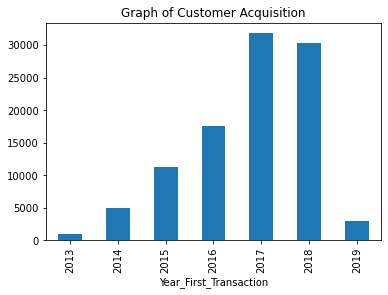

In [13]:
df_year = df.groupby(['Year_First_Transaction'])['Customer_ID'].count()
df_year.plot(x='Year_First_Transaction', y='Customer_ID', kind='bar', title='Graph of Customer Acquisition')
plt.xlabel('Year_First_Transaction')
plt.savefig('Graph of Customer Acquisition.png')

Berdasarkan visualisasi bar plot di atas, dapat diambil informasi:

- Terdapat tren pertumbuhan dalam akusisi pelanggan baru mulai tahun 2013-2018. Tren penurunan dari tahun 2018-2019 belum dapat disimpulkan karena data terakhir diambil pada bulan Februari tahun 2019.

- Tahun 2017 merupakan tahun di mana akuisisi pelanggan baru mencapai puncaknya

**Rata-rata transaksi per tahun untuk setiap produknya**

visualisasikan tren dari tahun ke tahun rata-rata jumlah transaksi untuk tiap-tiap produknya

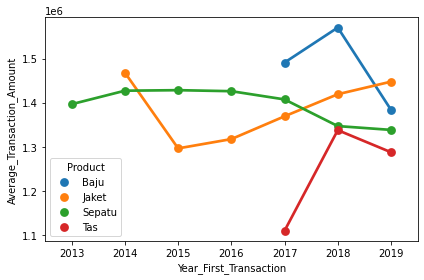

In [14]:
import seaborn as sns

plt.clf()
sns.pointplot(data = df.groupby(['Product', 'Year_First_Transaction']).mean().reset_index(), 
              x='Year_First_Transaction', 
              y='Average_Transaction_Amount', 
              hue='Product')
plt.tight_layout()
plt.savefig('Average transaction amount by year')
plt.show()

Berdasarkan hasil visualisasi di atas, dapat ditarik informasi:

- Produk tas dan baju kemungkinan merupakan produk baru yang mulai dijual pada tahun 2017. Meskipun produk baru, sejak tahun 2017-2018, produk baju merupakan produk yang paling populer di antara ketiga produk lainnya.

- Produk jaket terus mengalami tren pertumbuhan sejak tahun 2015

- Produk sepatu mengalami tren penurunan sejak tahun 2017

- Produk tas mengalami tren kenaikan yang signifikan dari tahun 2017-2018. grafik tren 2018-2019 dapat menjadi target untuk mempertahankan kenaikan ini pada tahun 2019 mengingat data terakhir baru berada di bulan Februari 2019

**Visualisasi proporsi churned customer untuk setiap produk**

<Figure size 432x288 with 0 Axes>

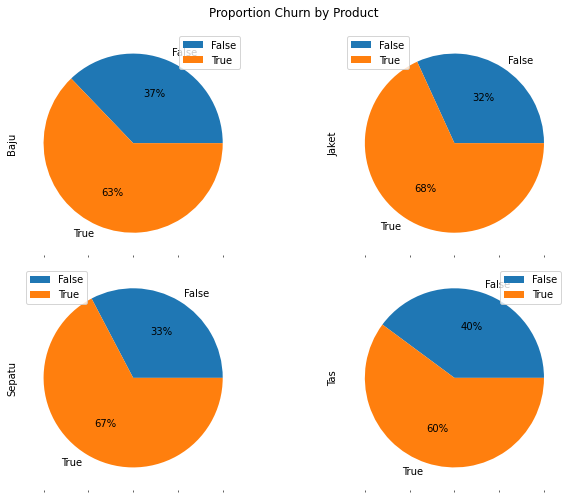

In [15]:
plt.clf()
# Melakukan pivot data dengan pivot_table
df_piv = df.pivot_table(index='is_churn', 
                        columns='Product',
                        values='Customer_ID', 
                        aggfunc='count', 
                        fill_value=0)

# Mendapatkan Proportion Churn by Product
plot_product = df_piv.count().sort_values(ascending=False).head(5).index
# Plot pie chartnya
df_piv = df_piv.reindex(columns=plot_product)
df_piv.plot.pie(subplots=True,
                figsize=(10, 7),
                layout=(-1, 2),
                autopct='%1.0f%%',
                title='Proportion Churn by Product')
plt.tight_layout()
plt.savefig('Proporsi churned customer untuk setiap produk')
plt.show()

Berdasarkan hasil visualisasi pie chart di atas, dapat diambil informasi bahwa produk jaket mengalami churn paling besar dengan prosentase sebesar 68%.

**Distribusi kategorisasi count transaction**

Kategorisasi ini dilakukan dengan mengelompokkan jumlah transaksi dengan aturan sebagai berikut:

#Rentang jumlah transaksi = Kategori
- s/d 1	  = 1. 1
- 2 s/d 3 =	2. 2 - 3
- 4 s/d 6 =	3. 4 - 6
- 7 s/d 10 = 4. 7 - 10
- > 10 = 5. > 10

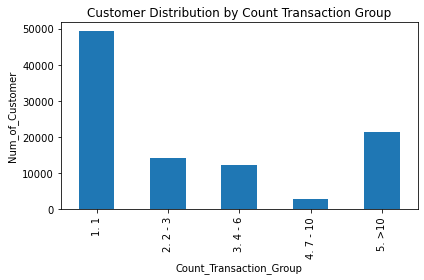

In [16]:
plt.clf()
# Kategorisasi jumlah transaksi
def func(row):
    if row['Count_Transaction'] == 1:
        val = '1. 1'
    elif (row['Count_Transaction'] > 1 and row['Count_Transaction'] <= 3):
        val = '2. 2 - 3'
    elif (row['Count_Transaction'] > 3 and row['Count_Transaction'] <= 6):
        val = '3. 4 - 6'
    elif (row['Count_Transaction'] > 6 and row['Count_Transaction'] <= 10):
        val = '4. 7 - 10'
    else:
        val = '5. >10'
    return val
# Tambahkan kolom baru
df['Count_Transaction_Group'] = df.apply(func, axis=1)

df_year = df.groupby(['Count_Transaction_Group'])['Customer_ID'].count()
df_year.plot(x='Count_Transaction_Group', y='Customer_ID', kind='bar', title='Customer Distribution by Count Transaction Group')
plt.xlabel('Count_Transaction_Group')
plt.ylabel('Num_of_Customer')
plt.tight_layout()
plt.savefig('Distribusi kategorisasi count transaction')
plt.show()

Berdassarkan visualisasi bar plot di atas dapat diambil informasi bahwa pola pembelian pelanggan lebih banyak pelanggan bertransaksi dalam jumlah kecil, yaitu 1.

**Distribusi kategorisasi average transaction amount**

Kategorisasi ini dilakukan dengan mengelompokkan rata-rata besar transaksi seperti yang diperlihatkan oleh tabel berikut:

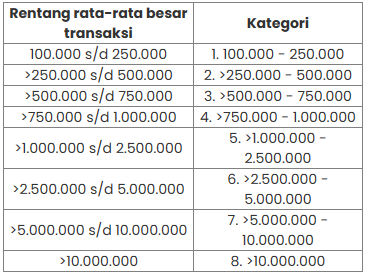


**Distribusi kategorisasi average transaction amount**

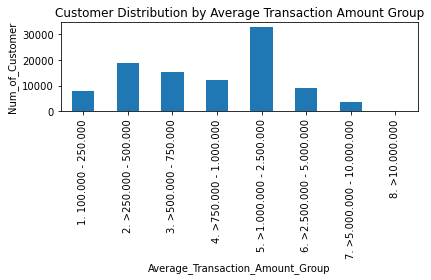

In [17]:
plt.clf()
# Kategorisasi rata-rata besar transaksi
def f(row):
    if (row['Average_Transaction_Amount'] >= 100000 and row['Average_Transaction_Amount'] <=250000):
        val ='1. 100.000 - 250.000'
    elif (row['Average_Transaction_Amount'] > 250000 and row['Average_Transaction_Amount'] <=500000):
        val ='2. >250.000 - 500.000'
    elif (row['Average_Transaction_Amount'] > 500000 and row['Average_Transaction_Amount'] <=750000):
        val ='3. >500.000 - 750.000'
    elif (row['Average_Transaction_Amount'] > 750000 and row['Average_Transaction_Amount'] <=1000000):
        val ='4. >750.000 - 1.000.000'
    elif (row['Average_Transaction_Amount'] > 1000000 and row['Average_Transaction_Amount'] <=2500000):
        val ='5. >1.000.000 - 2.500.000'
    elif (row['Average_Transaction_Amount'] > 2500000 and row['Average_Transaction_Amount'] <=5000000):
        val ='6. >2.500.000 - 5.000.000'
    elif (row['Average_Transaction_Amount'] > 5000000 and row['Average_Transaction_Amount'] <=10000000):
        val ='7. >5.000.000 - 10.000.000'
    else:
        val ='8. >10.000.000'
    return val
# Tambahkan kolom baru
df['Average_Transaction_Amount_Group'] = df.apply(f, axis=1)

df_year = df.groupby(['Average_Transaction_Amount_Group'])['Customer_ID'].count()
df_year.plot(x='Average_Transaction_Amount_Group', y='Customer_ID', kind='bar', title='Customer Distribution by Average Transaction Amount Group')
plt.xlabel('Average_Transaction_Amount_Group')
plt.ylabel('Num_of_Customer')
plt.tight_layout()
plt.savefig('Distribusi kategorisasi average transaction amount')
plt.show()

Dari hasil visualisasi bar plot di atas dapat ditarik informasi bahwa pengeluaran pelanggan lebih banyak tersebar pada kategori 5.

Feature engineering 'Year_Diff' yang berasal dari pengurangan Last transaction - First transaction

In [18]:
df['Year_Diff'] = df['Year_Last_Transaction'] - df['Year_First_Transaction']

In [19]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['is_churn'] = label_encoder.fit_transform(df['is_churn'])

# Modelling

Menentukan fitur X dan Y

In [20]:
feature_columns = ['Average_Transaction_Amount', 'Count_Transaction', 'Year_Diff']

# Features variable
X = df[feature_columns] 

# Target variable
y = df['is_churn'] 

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# Inisiasi model logreg
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train, y_train)

# Predict model
y_pred = logreg.predict(X_test)

# Evaluasi model menggunakan confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', cnf_matrix)

Confusion Matrix:
 [[    1  8330]
 [    3 16666]]


**Visualisasi Confussion Matrix**

<Figure size 432x288 with 0 Axes>

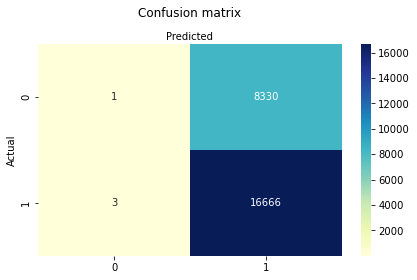

In [23]:
import numpy as np
import seaborn as sns

plt.clf()
# name  of classes
class_names = [0, 1] 
fig, ax = plt.subplots()

tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='YlGnBu', fmt='g')
ax.xaxis.set_label_position('top')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()

**Evaluasi Model**

In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

#Menghitung Accuracy, Precision, dan Recall
print('Accuracy :', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, average='micro'))
print('Recall   :', recall_score(y_test, y_pred, average='micro'))

Accuracy : 0.66668
Precision: 0.66668
Recall   : 0.66668


Berdasarkan evaluasi model yang dibangun menggunakan algoritma LogisticRegression, diperoleh nilai akurasi, precision, dan recall sebesar 0.66. Nilai pada evaluasi ini dapat menjadi tolak ukur apakah model akan tetap digunakan atau melakukan tindakan lain seperti hyperparameter tuning atau mengganti jenis algoritma untuk memperbaiki performa model.